In [14]:

import numpy as np
import pandas as pd


# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler



# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')



In [15]:
data = pd.read_csv('data/sp500_stocks.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#sort by Date
data.sort_values(by='Date', inplace=True)
#add 25 and 50 rolling avergaed of close by Symbol
data['25ma'] = data.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=25).mean())
data['50ma'] = data.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=50).mean())

#drop rows with NaN

data.tail()

#set frequency to daily




,Symbol,Adj Close,Close,High,Low,Open,Volume,25ma,50ma
Date,,,,,,,,,
2024-03-18,LW,102.860001,102.860001,103.570000,100.559998,101.599998,1242540.0,102.164800,103.951400
2024-03-18,GD,277.600006,277.600006,277.720001,274.670013,275.989990,850451.0,272.687198,265.926198
2024-03-18,HAS,53.290001,53.290001,53.466000,52.959999,53.250000,1173531.0,51.206800,50.285000
2024-03-18,CTVA,54.709999,54.709999,55.450001,54.520000,55.450001,2943730.0,54.533600,51.175400
2024-03-18,ZTS,170.690002,170.690002,174.279999,170.410004,173.740005,4919422.0,186.989202,189.794401


In [16]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
data.dropna(subset=['Close', '25ma', '50ma','Symbol'], inplace=True)
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.05814622752992534
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0


In [17]:
#split data into train and test
data_msft = data[data['Symbol'] == 'MSFT']
print(data_msft.head())
data_msft = data_msft.asfreq('D')

#print missing values
print(f'Number of rows with missing values: {data_msft.isnull().any(axis=1).mean()}')
#display entire dataframe
print(display(data_msft))
#drop rows with missing values
data_msft.dropna(subset=['Close', '25ma', '50ma','Symbol'], inplace=True)


           Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2010-03-16   MSFT  22.339375  29.370001  29.490000  29.200001  29.420000   
2010-03-17   MSFT  22.537151  29.629999  29.870001  29.400000  29.500000   
2010-03-18   MSFT  22.521931  29.610001  29.719999  29.500000  29.629999   
2010-03-19   MSFT  22.506720  29.590000  29.900000  29.350000  29.760000   
2010-03-22   MSFT  22.514334  29.600000  29.700001  29.389999  29.500000   

                Volume     25ma     50ma  
Date                                      
2010-03-16  36723500.0  28.6544  29.1646  
2010-03-17  50385700.0  28.7192  29.1382  
2010-03-18  43845200.0  28.7840  29.1112  
2010-03-19  81332100.0  28.8428  29.0876  
2010-03-22  37718200.0  28.9096  29.0706  
Number of rows with missing values: 0.31092436974789917


,Symbol,Adj Close,Close,High,Low,Open,Volume,25ma,50ma
Date,,,,,,,,,
2010-03-16,MSFT,22.339375,29.370001,29.490000,29.200001,29.420000,36723500.0,28.654400,29.1646
2010-03-17,MSFT,22.537151,29.629999,29.870001,29.400000,29.500000,50385700.0,28.719200,29.1382
2010-03-18,MSFT,22.521931,29.610001,29.719999,29.500000,29.629999,43845200.0,28.784000,29.1112
2010-03-19,MSFT,22.506720,29.590000,29.900000,29.350000,29.760000,81332100.0,28.842800,29.0876
2010-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-03-14,MSFT,425.220001,425.220001,427.820007,417.989990,420.239990,34157300.0,410.013201,401.9620
2024-03-15,MSFT,416.420013,416.420013,422.600006,412.790009,419.290009,45049800.0,410.105602,402.8784
2024-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None


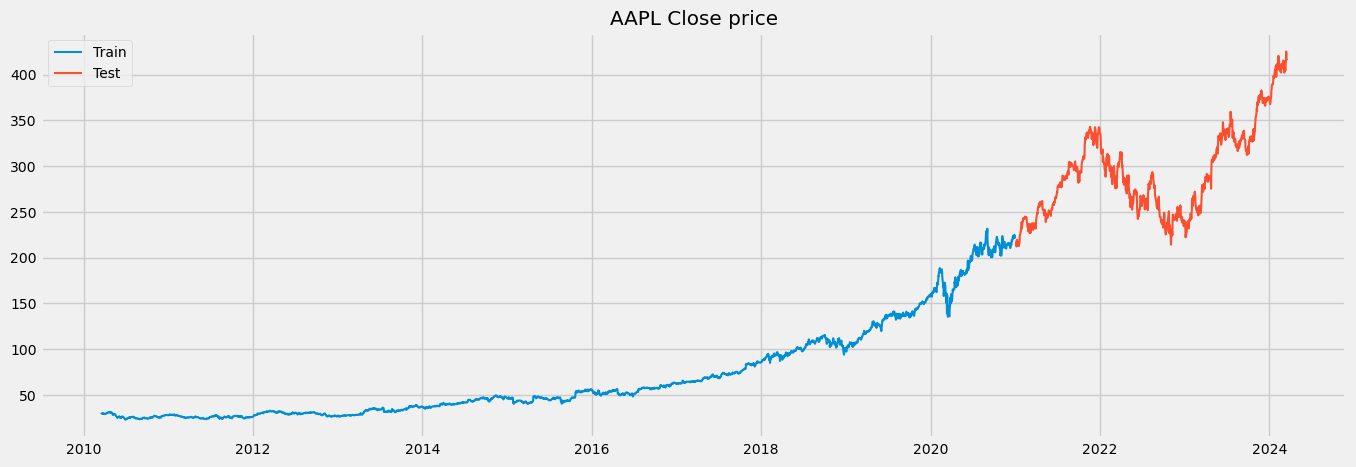

Number of rows with missing values: 0.0
Number of rows with missing values: 0.0


In [18]:

#set frequency to daily
data_train_msft = data_msft.loc[data_msft.index < '2021-01-01']
data_test_msft = data_msft.loc[data_msft.index >= '2021-01-01']

#plot the data
plt.figure(figsize=(15, 5))
plt.plot(data_train_msft.index, data_train_msft['Close'], label='Train')
plt.plot(data_test_msft.index, data_test_msft['Close'], label='Test')

plt.title('AAPL Close price')
plt.legend()
plt.show()

print(f'Number of rows with missing values: {data_train_msft.isnull().any(axis=1).mean()}')
print(f'Number of rows with missing values: {data_test_msft.isnull().any(axis=1).mean()}')

In [19]:
data_train_msft.tail()
#count percentage of missing values
print(f'Percentage of missing values in Close: {data_train_msft["Close"].isnull().mean()}')


#drop columns except data, 25ma, 50ma, Close
data_train_msft = data_train_msft[['Close', '25ma', '50ma']]

data_test_msft = data_test_msft[['Close', '25ma', '50ma']]

#drop rows with missing values


#count percentage of missing values
print(f'Percentage of missing values in Close: {data_train_msft["Close"].isnull().mean()}')

data_train_msft.tail()

Percentage of missing values in Close: 0.0
Percentage of missing values in Close: 0.0


,Close,25ma,50ma
Date,,,
2020-12-24,222.750000,215.677200,214.641400
2020-12-28,224.960007,216.178800,214.747400
2020-12-29,224.149994,216.729200,214.837199
2020-12-30,221.679993,217.192000,214.986399
2020-12-31,222.419998,217.534399,215.141799


In [20]:
display(data_test_msft)
#drop rows with missing values
data_test_msft.dropna(subset=['Close', '25ma', '50ma'], inplace=True)
data_test_msft.tail()

,Close,25ma,50ma
Date,,,
2021-01-04,217.690002,217.687200,215.199599
2021-01-05,217.899994,217.794000,215.259799
2021-01-06,212.250000,217.721199,215.180199
2021-01-07,218.289993,217.804399,215.344399
2021-01-08,219.619995,217.974399,215.471799
...,...,...,...
2024-03-12,415.279999,409.182000,400.093799
2024-03-13,415.100006,409.566400,400.874999
2024-03-14,425.220001,410.013201,401.962000


,Close,25ma,50ma
Date,,,
2024-03-12,415.279999,409.182000,400.093799
2024-03-13,415.100006,409.566400,400.874999
2024-03-14,425.220001,410.013201,401.962000
2024-03-15,416.420013,410.105602,402.878400
2024-03-18,417.320007,409.976403,403.866000


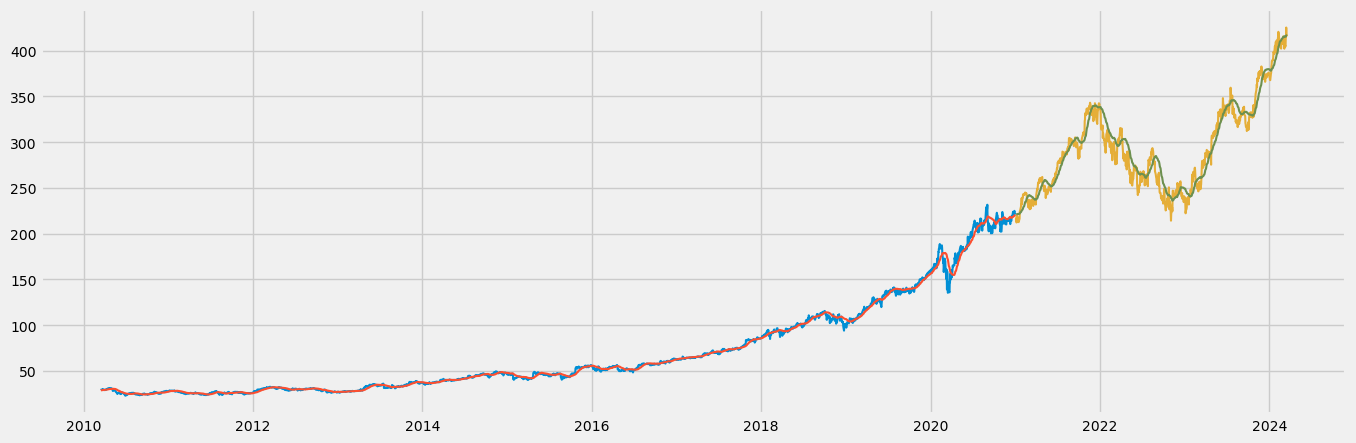

In [22]:
#forcast the close price using the 25ma and 50ma
#train the model

X_train = data_train_msft[['25ma', '50ma']]
y_train = data_train_msft['Close']

X_test = data_test_msft[['25ma', '50ma']]
y_test = data_test_msft['Close']

#standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
model = Ridge() 
model.fit(X_train_scaled, y_train)

#predict the close price
y_train_pred = model.predict(X_train_scaled)

y_test_pred = model.predict(X_test_scaled)

#plot the results
plt.figure(figsize=(15, 5))
plt.plot(data_test_msft.index, y_test, label='Test')
plt.plot(data_test_msft.index, y_test_pred, label='Test pred')